# DCB效益追蹤

DCB效益追蹤應從三方面著手：
- 客服進線詢問量
- IVR自助服務使用量
- 使用後轉換率

## 客服進線詢問量

In [1]:
import pandas as pd
import numpy as np
import pymssql

conn = pymssql.connect(server = 'SDBW07T', database = 'CMUATSQL', 
                       autocommit = True)
sql_qurry = '''
SELECT * 
FROM [dbo].[WRK_UserLog]
WHERE [SYS_DT] >= '2018-07-01'
'''

df = pd.read_sql(sql_qurry, conn)

In [2]:
df = pd.read_csv('../2. Prepared Data/20180723_用戶服務紀錄.csv', engine = 'python', encoding = 'utf-8', 
                 dtype={'合約編號':object, '門號':object, '帳戶編號':object})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485925 entries, 0 to 485924
Data columns (total 15 columns):
合約編號              485925 non-null object
門號                485925 non-null object
帳戶編號              485925 non-null object
合約狀態              485925 non-null object
客戶等級              485925 non-null object
服務啟始日期時間          485925 non-null object
進件來源              485925 non-null object
案件類別              485925 non-null object
Call Type第一層名稱    485925 non-null object
Call Type第二層名稱    485925 non-null object
Call Type第三層名稱    485925 non-null object
備註                470248 non-null object
承辦人員代碼            477558 non-null object
服務人員工編號           485925 non-null object
服務需求編號            485925 non-null object
dtypes: object(15)
memory usage: 55.6+ MB


In [4]:
df.head()

,合約編號,門號,帳戶編號,合約狀態,客戶等級,服務啟始日期時間,進件來源,案件類別,Call Type第一層名稱,Call Type第二層名稱,Call Type第三層名稱,備註,承辦人員代碼,服務人員工編號,服務需求編號
0,0063960669,0930711783,0064008977,無效,一般,2018-06-28 11:26:35,GIS,SERVICE INQUIRY,網路品質問題(查詢類),06.突發狀況,02.計畫性作業,#新北市板橋區縣民大道三段103巷19號四樓，基地台編號：L220033 即時狀態：異常 ，...,16077117,SADMIN,18T 745551
1,0063960669,0930711783,0064008977,無效,一般,2018-06-28 11:26:35,GIS,SERVICE INQUIRY,網路品質問題(查詢類),06.突發狀況,02.計畫性作業,#新北市板橋區縣民大道三段103巷19號四樓，基地台編號：L220033 即時狀態：異常 ，...,16077117,SADMIN,18T 745551
2,0063960669,0930711783,0064008977,無效,一般,2018-06-28 11:26:35,GIS,SERVICE INQUIRY,網路品質問題(查詢類),06.突發狀況,02.計畫性作業,#新北市板橋區縣民大道三段103巷19號四樓，基地台編號：L220033 即時狀態：異常 ，...,16077117,SADMIN,18T 745551
3,0063960669,0930711783,0064008977,無效,一般,2018-07-11 12:22:51,GIS,SERVICE INQUIRY,網路品質問題(查詢類),06.突發狀況,02.計畫性作業,#新北市板橋區縣民大道三段103巷19號4樓，基地台編號：L220033 基地台障礙歷程...,18058990,SADMIN,18T 754588
4,0063960669,0930711783,0064008977,無效,一般,2018-07-11 12:22:51,GIS,SERVICE INQUIRY,網路品質問題(查詢類),06.突發狀況,02.計畫性作業,#新北市板橋區縣民大道三段103巷19號4樓，基地台編號：L220033 基地台障礙歷程...,18058990,SADMIN,18T 754588


In [5]:
df_dcb = df.loc[(df['Call Type第二層名稱'].str.contains('oogle|pple|小額|DCB|額度') | 
      df['Call Type第三層名稱'].str.contains('oogle|pple|小額|DCB|額度'))&
      ~df['Call Type第二層名稱'].str.contains('儲值')]

In [6]:
df_dcb['employee'] = df_dcb.loc[df_dcb['服務人員工編號'] == 'SADMIN', ['承辦人員代碼']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
df_dcb.sort_values('服務啟始日期時間', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_dcb

,合約編號,門號,帳戶編號,合約狀態,客戶等級,服務啟始日期時間,進件來源,案件類別,Call Type第一層名稱,Call Type第二層名稱,Call Type第三層名稱,備註,承辦人員代碼,服務人員工編號,服務需求編號,employee
343568,0069657614,0968906150,0070328261,生效,一般,2018-06-01 00:30:16,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@968906150@大夜話術說明，請客早上七點後來電,15096251,SADMIN,X-3F70873,15096251
256679,0089932329,0908296232,0092324981,部份停用,一般,2018-06-01 00:34:29,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@908296232@本人 承 1-6542804215 說明,15096251,SADMIN,X-3F70890,15096251
65439,0082608715,0908369233,0086782847,生效,一般,2018-06-01 00:57:40,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@908369233@進線號碼//大夜時段，婉釋已請客早上7點過後來電或透過APP及123I...,18038796,SADMIN,X-3F70936,18038796
262284,0004022201,0973299996,0004037477,生效,一般,2018-06-01 01:14:09,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@973299996@進線號碼//大夜時段，婉釋已請客早上7點過後來電或透過APP及123I...,18038796,SADMIN,X-3F709A4,18038796
186032,0084624478,0908639103,0086672711,生效,一般,2018-06-01 01:20:49,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@908963103@進線號碼//大夜時段，婉釋已請客早上7點過後來電或透過APP及123I...,18038796,SADMIN,X-3F709DD,18038796
297882,0066803681,0908605311,0067141473,生效,一般,2018-06-01 02:04:04,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@908605311@大夜話術說明，請客早上七點後來電,15096251,SADMIN,X-3F70A51,15096251
50683,0050458634,0979342978,0050028344,生效,一般,2018-06-01 02:44:23,Phone,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB開啟(異動回寫),NaN,15096251,SADMIN,X-3F71016,15096251
398026,0091888525,0981601167,0094449172,生效,一般,2018-06-01 02:56:23,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB額度調整(異動回寫),@981601167@大夜話術說明，請客早上七點後來電,15096251,SADMIN,X-3F71023,15096251
261089,0080541821,0968868106,0082338265,生效,一般,2018-06-01 03:18:30,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,@968868106@12386,15096251,SADMIN,X-3F7103D,15096251
263759,0066081238,0908109620,0066322866,生效,一般,2018-06-01 04:05:16,UI,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB額度調整(異動回寫),@908109620@大夜話術說明，請客早上七點後來電,15096251,SADMIN,X-3F7109C,15096251


In [12]:
df_dcb['服務啟始日期時間'] = pd.to_datetime(df_dcb['服務啟始日期時間'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_dcb['diff_time'] = df_dcb.groupby('合約編號')['服務啟始日期時間'].diff()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
# df_dcb['same_call'] = np.cumsum()
df_dcb.sort_values(['合約編號', '服務啟始日期時間'], inplace = True)
df_dcb['same_call'] = (df_dcb['diff_time'].isna() | (df_dcb['diff_time'] > pd.to_timedelta('00:30:00')) | 
                             ((df_dcb['employee'] != df_dcb['employee'].shift()) &
                             (df_dcb['合約編號'] == df_dcb['合約編號'].shift()))).cumsum()
df_dcb.drop_duplicates('same_call', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
df_dcb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33347 entries, 3307 to 98538
Data columns (total 18 columns):
合約編號              33347 non-null object
門號                33347 non-null object
帳戶編號              33347 non-null object
合約狀態              33347 non-null object
客戶等級              33347 non-null object
服務啟始日期時間          33347 non-null datetime64[ns]
進件來源              33347 non-null object
案件類別              33347 non-null object
Call Type第一層名稱    33347 non-null object
Call Type第二層名稱    33347 non-null object
Call Type第三層名稱    33347 non-null object
備註                22585 non-null object
承辦人員代碼            33347 non-null object
服務人員工編號           33347 non-null object
服務需求編號            33347 non-null object
employee          33347 non-null object
diff_time         8954 non-null timedelta64[ns]
same_call         33347 non-null int32
dtypes: datetime64[ns](1), int32(1), object(15), timedelta64[ns](1)
memory usage: 4.7+ MB


In [40]:
df_dcb['SYS_DT'] = df_dcb['服務啟始日期時間'].apply(lambda x : str(x)[0:10])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_dcb.head()

,合約編號,門號,帳戶編號,合約狀態,客戶等級,服務啟始日期時間,進件來源,案件類別,Call Type第一層名稱,Call Type第二層名稱,Call Type第三層名稱,備註,承辦人員代碼,服務人員工編號,服務需求編號,employee,diff_time,same_call,SYSDT
3307,0000074193,0986323321,0000074193,部份停用,一般,2018-06-09 07:49:50,Phone,SERVICE INQUIRY,07.產品服務,google play/apple itunes,DCB查詢狀態,Google Play#本人說明額度今天早上10-11點恢復,16077133,SADMIN,X-440F8BD,16077133,NaT,1,2018-06-09
94636,0000109629,0986206068,0000109629,生效,一般-優質,2018-08-11 15:05:16,UI,SERVICE CHANGE,11.帳單/繳款,申請/取消帳單,開啟_小額帳單每月強制交寄,@986206068@,11063908,SADMIN,18062838842,11063908,NaT,2,2018-08-11
191383,0000163326,0986252616,0000163359,無效,關企員工,2018-08-30 17:40:19,UI,SERVICE INQUIRY,11.帳單/繳款,帳單金額及導讀,查詢帳單/小額帳單簡訊發送進度,@986923616@本人查此號是否為紙本帳單,18079211,SADMIN,X-5211345,18079211,NaT,3,2018-08-30
452889,0000190607,0986410011,0000190631,生效,一般,2018-07-16 15:28:34,Phone,SERVICE INQUIRY,07.產品服務,小額付款,小額付款查詢狀態,小額付款#客表示維持在1000的額度即可,TC400069,SADMIN,X-4A38D1C,TC400069,NaT,4,2018-07-16
440206,0000246609,0986252606,0000163359,生效,關企員工,2018-08-30 17:44:02,UI,SERVICE INQUIRY,11.帳單/繳款,帳單金額及導讀,查詢帳單/小額帳單簡訊發送進度,@986923616@本人查此號是否為紙本帳單,18079211,SADMIN,X-5211411,18079211,NaT,5,2018-08-30


In [43]:
df_dcb['SYS_DT'] = pd.to_datetime(df_dcb['SYS_DT'])
df_dcb.sort_values('SYS_DT', inplace=True)
dcb_count = df_dcb.groupby('SYS_DT').count()['合約編號']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
dcb_count.head()

SYS_DT
2018-06-01    383
2018-06-02    333
2018-06-03    302
2018-06-04    330
2018-06-05    386
Name: 合約編號, dtype: int64

### 視覺化

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

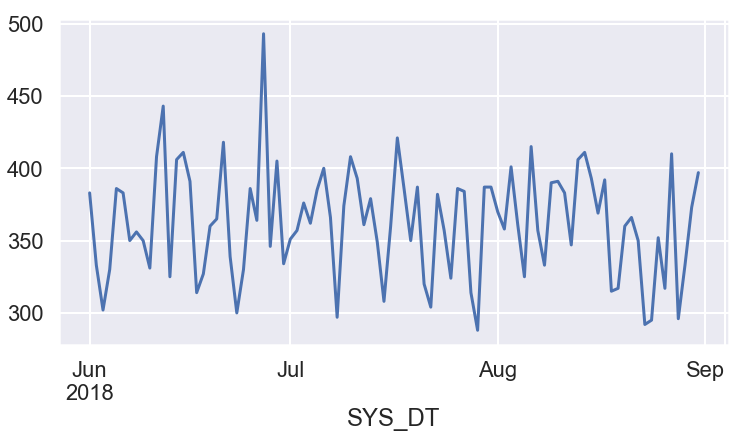

In [46]:
sns.set(context='poster')
dcb_count.plot(figsize=(12,6))